# Template for the function cross_validation

In [1]:
# Do not run this line more than once! Otherwise restart kernel
import os
print('Initial wdir: ' + os.getcwd())
os.chdir('../../../')
print('Current wdir: ' + os.getcwd())

Initial wdir: C:\Users\redur\OneDrive\Analytics Club\ForGit\ml-workflow\notebooks\Max_Muster\Templates
Current wdir: C:\Users\redur\OneDrive\Analytics Club\ForGit\ml-workflow


In [2]:
# import function cross_validation
from src.utils.exploration import cross_validation

from sklearn.pipeline import Pipeline

# import classifiers
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [3]:
# get Data
from sklearn.datasets import load_iris
data = load_iris()
x = data['data']
y = data['target']
feature_size = len(x[0])

# Example 1 - Neural Net with Keras

In order to use the scikit-learn functions for neural nets built with keras we need to use a scikit-learn wrapper "KerasClassifier". This wrapper takes a predefined model which we want to get as a function of parameters such that we will be able to tune those parameters by using cross validation.

In [ ]:
# define neural net
def nn_model(node1=20, node2=20, dropout=0.2):
    model = Sequential()
    model.add(Dense(node1, input_dim=feature_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(node2, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])   
    return model

Define a Pipeline using the scikit-learn wrapper. The parameters of the model can either directly be passed to KerasClassifier or later as a dict.

In [ ]:
class_weights = {0: 1/3,
                 1: 1/3,
                 2: 1/3
                }

In [ ]:
cv_model_nn = Pipeline([('nn', KerasClassifier(build_fn=nn_model, validation_split=0, verbose=0))])
model_name = 'Neural Net'

Define the fitting parameters.

In [28]:
fit_params_nn = {'nn__epochs': 30,
                 'nn__batch_size': 128,
                'clf__class_weight': class_weights}

In [29]:
params_nn = {'nn__node1': [5, 10, 20],
             'nn__node2': [5, 10, 20],
             'nn__dropout': [0, 0.2, 0.4]    
}

Perform the cross validation.
Params:
- cv_model_nn: Tuple of Pipeline and name
- params_nn: Dicts of parameter grid
- x: Features
- y: labels
- folds: number of cv folds
- visualize: Wheter or not to visualize the results
- n_jobs: number of kernels used
- details: wheter or not to show information about every evaluation
- fit_params: fitting parameters
- save: wheter or not to save results to a csv. The figures get saved as well if visualize=true

Grid Cross Validation for the model: Neural Net
with parameters: 
nn__node1: [5, 10, 20]
nn__node2: [5, 10, 20]
nn__dropout: [0, 0.2, 0.4]
Number of Folds: 8


C:\Program Files\Anaconda3\envs\env_arag\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


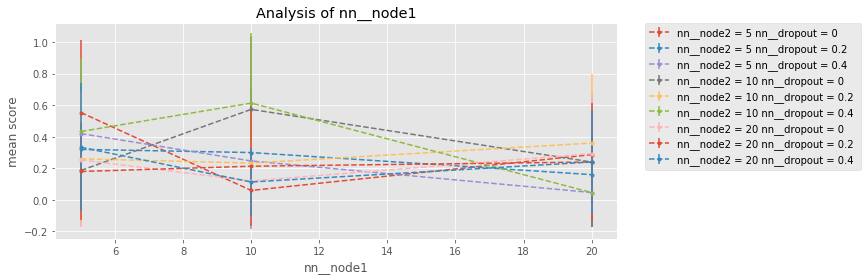

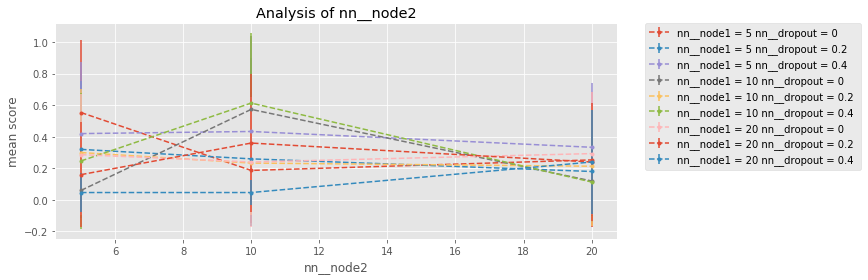


Best estimator: Pipeline(memory=None,
     steps=[('nn', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E0B2B607B8>)])
Best score: 0.6133333327372869

Best parameters:
nn__dropout: 0.4 
nn__node1: 10 
nn__node2: 10
Time needed: 1435.454468011856


In [30]:
# With KerasClassifier only n_jobs=1 works.
# Attention - it takes about 20 minutes to run the below code
cross_validation(cv_model_nn, model_name, params_nn, x, y, folds=8, visualize=True, n_jobs=1, details=False, fit_params=fit_params_nn, save=True)

# Example 2 - Classification with SVC

In [4]:
cv_model_svc = Pipeline([('clf', SVC(kernel='poly', class_weight='balanced'))])
model_name = 'SVC'

In [5]:
params_svc = {'clf__gamma': [1e-3, 0.01, 0.02, 0.035, 0.05, 0.07],
             'clf__degree': [2, 3, 4]}

Grid Cross Validation for the model: SVC
with parameters: 
clf__gamma: [0.001, 0.01, 0.02, 0.035, 0.05, 0.07]
clf__degree: [2, 3, 4]
Number of Folds: 10


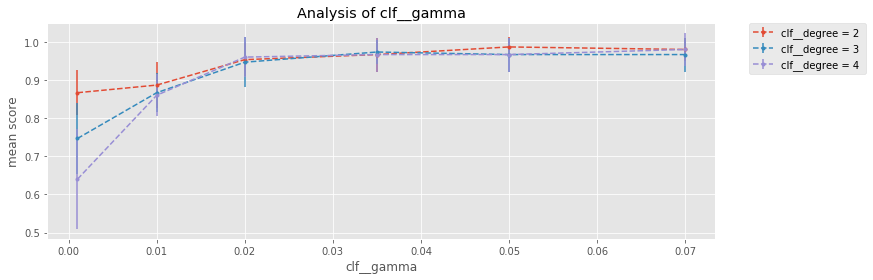

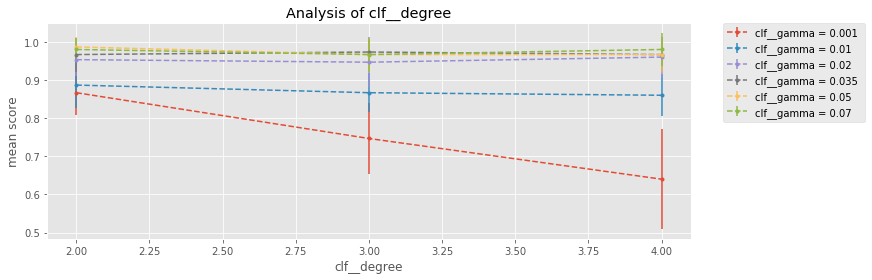


Best estimator: Pipeline(memory=None,
     steps=[('clf', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.05, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Best score: 0.9866666666666667

Best parameters:
clf__degree: 2 
clf__gamma: 0.05
Time needed: 2.937377691268921s


In [6]:
cross_validation(cv_model_svc, model_name, params_svc, x, y, folds=10, visualize=True, n_jobs=3, details=False, save=True)